# Supervised Learning: Linear Classifiers

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Datasets

In [2]:
# Heart disease data dataset for classification
data= pd.read_csv("heart.csv")
X_heart= data[data.columns[data.columns!= 'target']]
y_heart= data['target']

print(X_heart.shape)
print(y_heart.shape)

(303, 13)
(303,)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_heart, y_heart, random_state=0)

#### Linear Support Vector Machine

### Application of SVMs unnormalized data

In [4]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_heart, y_heart,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast heart dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast heart dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.58


### Application of SVMs to normalized data with feature preprocessing using minmax scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast heart dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast heart dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.86
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.83


### Application of K-Nearest Neighbors

In [6]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.64


### Application of K-Nearest Neighbors to normalized data with feature preprocessing

In [7]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))


Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.87


## Cross-validation

### Example based on k-NN classifier 

In [8]:
from sklearn.model_selection import cross_val_score
clf= KNeighborsClassifier(n_neighbors = 5)
cv_scores = cross_val_score(clf, X_heart, y_heart)

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [0.62376238 0.6039604  0.66336634]
Mean cross-validation score (3-fold): 0.630


## Validation curve example

In [9]:
from sklearn.model_selection import validation_curve


param_range = range(1,10,2)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_heart, y_heart,
                                            param_name='n_neighbors',
                                            param_range=param_range, cv=3)

In [10]:
print(train_scores)

[[1.         1.         1.        ]
 [0.72772277 0.7970297  0.81188119]
 [0.76732673 0.72772277 0.80693069]
 [0.74752475 0.72277228 0.75742574]
 [0.74752475 0.69306931 0.7029703 ]]


In [11]:
print(test_scores)

[[0.61386139 0.56435644 0.61386139]
 [0.6039604  0.57425743 0.64356436]
 [0.62376238 0.6039604  0.66336634]
 [0.64356436 0.62376238 0.63366337]
 [0.6039604  0.66336634 0.62376238]]


<IPython.core.display.Javascript object>


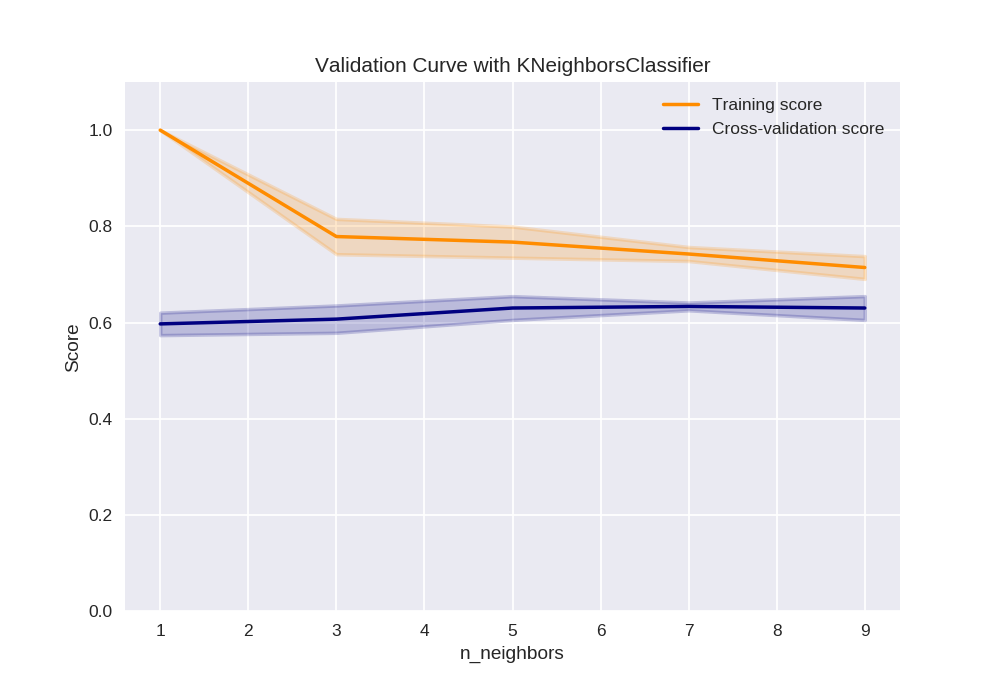

In [12]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with KNeighborsClassifier')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.plot(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.plot(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()